In [2]:
from sklearn.datasets import *
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns


#print(bos.head())






In [3]:
boston = load_boston()
print(boston.keys())

bos = pd.DataFrame(boston.data)
bos.columns = boston.feature_names
bos['Prices'] = boston.target


dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


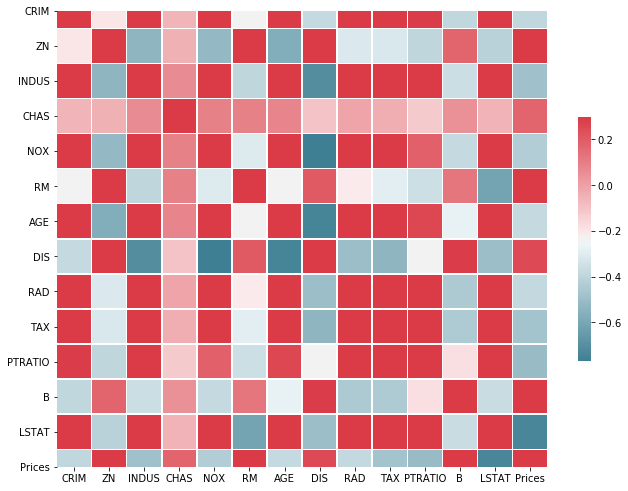

In [4]:
cor_mat = bos.corr()
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(cor_mat, cmap=cmap, vmax=.3, square=True, linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)


In [11]:
col = bos.columns.drop('Prices')

In [16]:
reg = linear_model.Ridge(alpha=10)
reg.fit(bos[boston.feature_names], bos['Prices'])
prices = reg.predict(bos[boston.feature_names])


In [17]:
coef = pd.Series(reg.coef_,index = col)

In [9]:
coef_ = reg.coef_

In [6]:

print(reg.coef_)
print(reg.intercept_)

[-0.10143535  0.0495791  -0.0429624   1.95202082 -2.37161896  3.70227207
 -0.01070735 -1.24880821  0.2795956  -0.01399313 -0.79794498  0.01003684
 -0.55936642]
27.46788496414152


In [7]:
plt.show()

Text(0.5, 1.0, 'Coefficients in the Ridge Model')

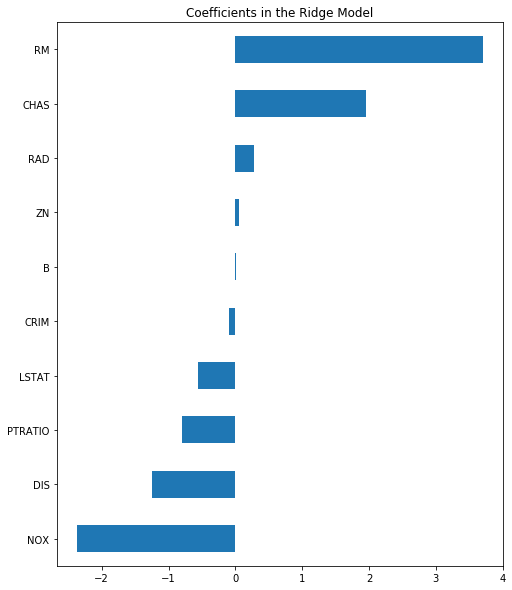

In [22]:
imp_coef = pd.concat([coef.sort_values().head(5),
                     coef.sort_values().tail(5)])
plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Ridge Model")